## Constant features

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

## Read Data

In [2]:
data = pd.read_csv('../DoHBrwTest.csv')
data.shape

(53860, 35)

In [3]:
data.columns

Index(['SourceIP', 'DestinationIP', 'SourcePort', 'DestinationPort',
       'TimeStamp', 'Duration', 'FlowBytesSent', 'FlowSentRate',
       'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance',
       'PacketLengthStandardDeviation', 'PacketLengthMean',
       'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian',
       'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation',
       'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean',
       'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian',
       'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation',
       'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation',
       'ResponseTimeTimeMean', 'ResponseTimeTimeMedian',
       'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian',
       'ResponseTimeTimeSkewFromMode',
       'ResponseTimeTimeCoefficientofVariation', 'is_intrusion'],
      dtype='object')

In [3]:
data.head(5)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,is_intrusion
0,7.0,2.0,52742,443,18355.0,0.046455,55,1183.941449,66,1420.729738,...,1.000000,0.000000,0.000000,0.046455,0.046455,0.046455,-10.000000,-10.000000,0.000000,0
1,7.0,2.0,54640,443,18365.0,96.750105,42044,434.562836,44920,464.288902,...,0.561877,0.001700,0.041234,0.033549,0.026931,0.026952,0.481463,0.159978,1.229096,0
2,7.0,2.0,56611,443,18373.0,96.365606,41539,431.056284,44577,462.582054,...,0.549156,0.000956,0.030926,0.026551,0.026848,0.026879,-0.028834,-0.010614,1.164778,0
3,7.0,2.0,56611,443,18374.0,121.356820,60659,499.840058,67897,559.482360,...,0.556570,0.001013,0.031829,0.027571,0.026862,0.026941,0.066819,0.019791,1.154439,0
4,7.0,2.0,56611,443,18375.0,104.669253,30409,290.524668,30718,293.476825,...,0.331633,0.001226,0.035013,0.029797,0.026867,0.026908,0.251063,0.082517,1.175049,0


### Train - Test Split

In [4]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['is_intrusion'], axis=1),       # drop the target
    data['is_intrusion'],                             # just the target
    test_size=0.2,
    random_state=0)
X_train.shape, X_test.shape

((43088, 34), (10772, 34))

### Using VarianceThreshold from Scikit-learn

The VarianceThreshold from sklearn provides a simple baseline approach to feature selection. It removes all features which variance doesn’t meet a certain threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples.

In [17]:
sel = VarianceThreshold(threshold=0.5)
sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0.5)

In [18]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
# (if necessary, print the result of sel.get_support() to understand its output)
sum(sel.get_support())

31

In [19]:
# now let's print the number of constant feautures
# (see how we use ~ to exclude non-constant features)
constant = ç[~sel.get_support()]
len(constant)

3

We can see that 0 columns / variables are constant. This means that 0 variables show the same value, just one value, for all the observations of the training set.

In [20]:
# let's print the constant variable names
constant

Index(['PacketLengthCoefficientofVariation', 'PacketTimeSkewFromMode',
       'PacketTimeCoefficientofVariation'],
      dtype='object')

In [9]:
# let's visualise the values of one of the constant variables
# as an example
# X_train['land'].unique()

In [10]:
# we can do the same for every feature:
for col in constant:
    print(col, X_train[col].unique())

We then use the transform() method of the VarianceThreshold to reduce the training and testing sets to its non-constant features.

Note that VarianceThreshold returns a NumPy array without feature names, so we need to capture the names first, and reconstitute the dataframe in a later step.

In [11]:
# capture non-constant feature names
feat_names = X_train.columns[sel.get_support()]

In [12]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((172351, 34), (43088, 34))

We have now 34 variables.

In [13]:
# X_train is a NumPy array
X_train

array([[ 0.00000000e+00,  1.50000000e+01,  4.43000000e+02, ...,
         1.86844666e+00,  6.22820077e-01,  1.60558848e+00],
       [ 1.50000000e+01,  1.90000000e+01,  5.10860000e+04, ...,
         5.74442321e-01,  9.49944930e-01,  1.04960773e+00],
       [ 1.20000000e+01,  1.90000000e+01,  4.92900000e+04, ...,
        -6.10720880e-03,  8.88497383e-01,  1.12336915e+00],
       ...,
       [ 1.40000000e+01,  1.90000000e+01,  5.34320000e+04, ...,
         1.05750985e+00,  3.55780608e-01,  2.81068714e+00],
       [ 6.00000000e+00,  1.70000000e+01,  4.22340000e+04, ...,
        -4.49487442e-02, -8.90313673e-03,  5.70609569e-01],
       [ 1.40000000e+01,  1.90000000e+01,  5.85680000e+04, ...,
         1.88465486e-01,  9.95131936e-01,  1.00442161e+00]])

In [14]:
# reconstitute de dataframe
X_train = pd.DataFrame(X_train, columns=feat_names)
X_train.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
0,0.0,15.0,443.0,48748.0,57158.0,120.680347,44075.0,365.221025,32352.0,268.080104,...,1.687356,0.592643,0.195534,0.442192,0.275408,0.000004,0.000002,1.868447,0.622820,1.605588
1,15.0,19.0,51086.0,443.0,129130.0,38.372541,12589.0,328.073140,19797.0,515.915795,...,0.752595,1.328735,0.000402,0.020058,0.019110,0.015269,0.000056,0.574442,0.949945,1.049608
2,12.0,19.0,49290.0,443.0,132627.0,34.085131,1875.0,55.009324,4964.0,145.635350,...,0.590720,1.692850,0.000297,0.017242,0.015348,0.015383,0.000029,-0.006107,0.888497,1.123369
3,10.0,19.0,51616.0,443.0,99688.0,34.072364,5526.0,162.184226,8324.0,244.303565,...,0.519807,1.923792,0.000069,0.008324,0.007309,0.000371,0.000040,2.500410,0.873295,1.138822
4,17.0,12.0,443.0,53996.0,117764.0,120.747050,209017.0,1731.031938,131899.0,1092.357950,...,-1.034429,0.499597,0.001467,0.038306,0.002653,0.000041,0.000036,0.204586,0.068326,14.437156


In the dataset NSL-KDD, 0 features was classified as constant were found, remaining the original 34 features of the dataset

## Standardize Data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

## Hyperparameter Optimization

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:
    
    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
    
    def fit(self, X, y, **grid_kwargs):
        for key in self.keys:
            print('Running GridSearchCV for %s.' % key)
            model = self.models[key]
            params = self.params[key]
            grid_search = GridSearchCV(model, params, **grid_kwargs)
            grid_search.fit(X, y)
            self.grid_searches[key] = grid_search
        print('Done.')
    
    def score_summary(self, sort_by='mean_test_score'):
        frames = []
        for name, grid_search in self.grid_searches.items():
            frame = pd.DataFrame(grid_search.cv_results_)
            frame = frame.filter(regex='^(?!.*param_).*$')
            frame['estimator'] = len(frame)*[name]
            frames.append(frame)
        df = pd.concat(frames)
        
        df = df.sort_values([sort_by], ascending=False)
        df = df.reset_index()
        df = df.drop(['rank_test_score', 'index'], 1)
        
        columns = df.columns.tolist()
        columns.remove('estimator')
        columns = ['estimator']+columns
        df = df[columns]
        return df

In [24]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier


models = { 
    'LogisticRegression': linear_model.LogisticRegression(max_iter=1000),
    'GaussianNB': GaussianNB(),
    'RandomForest': RandomForestClassifier(random_state=123),
    'KNN': KNeighborsClassifier(n_jobs=-1),
    'CatBoost': CatBoostClassifier(),
}

params = { 
    'LogisticRegression': {'C':[0.1,0.5,1,2,3,4,5,10,20,25]},
    'GaussianNB': {'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]},
    'RandomForest': {'max_depth': [70,80,90,100],'n_estimators': [100,1000]},
    'KNN': {'n_neighbors':[2,3,4,5],'leaf_size':[1,2,3],'weights':['uniform', 'distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute']},
    'CatBoost': {'depth':[4,5,6,7],'learning_rate':[0.01,0.02,0.03,0.04],'iterations':[10,20,30,40,50]}
}

In [25]:
%%time
helper = EstimatorSelectionHelper(models, params)
helper.fit(X_test, y_test, scoring='f1', n_jobs=2)

Running GridSearchCV for LogisticRegression.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Running GridSearchCV for GaussianNB.
Running GridSearchCV for RandomForest.


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Running GridSearchCV for KNN.


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Running GridSearchCV for CatBoost.


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0:	learn: 0.5310503	total: 76.2ms	remaining: 3.73s
1:	learn: 0.4043868	total: 88.8ms	remaining: 2.13s
2:	learn: 0.3033311	total: 100ms	remaining: 1.57s
3:	learn: 0.2313480	total: 111ms	remaining: 1.28s
4:	learn: 0.1773510	total: 122ms	remaining: 1.1s
5:	learn: 0.1348616	total: 134ms	remaining: 982ms
6:	learn: 0.1136671	total: 145ms	remaining: 892ms
7:	learn: 0.0940029	total: 157ms	remaining: 823ms
8:	learn: 0.0704442	total: 167ms	remaining: 763ms
9:	learn: 0.0555637	total: 179ms	remaining: 715ms
10:	learn: 0.0439968	total: 193ms	remaining: 683ms
11:	learn: 0.0372725	total: 204ms	remaining: 645ms
12:	learn: 0.0288220	total: 215ms	remaining: 611ms
13:	learn: 0.0247255	total: 225ms	remaining: 579ms
14:	learn: 0.0195871	total: 236ms	remaining: 551ms
15:	learn: 0.0155647	total: 246ms	remaining: 524ms
16:	learn: 0.0125599	total: 257ms	remaining: 499ms
17:	learn: 0.0102539	total: 268ms	remaining: 476ms
18:	learn: 0.0084870	total: 278ms	remaining: 454ms
19:	learn: 0.0071003	total: 289ms	remain

In [26]:
helper.score_summary()

,estimator,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
0,CatBoost,1.568618,0.045720,0.152324,0.046568,"{'depth': 7, 'iterations': 50, 'learning_rate'...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,CatBoost,1.257322,0.023742,0.116451,0.001681,"{'depth': 6, 'iterations': 40, 'learning_rate'...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,CatBoost,1.098225,0.008103,0.120340,0.003038,"{'depth': 4, 'iterations': 50, 'learning_rate'...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,CatBoost,1.410400,0.019287,0.129573,0.017943,"{'depth': 6, 'iterations': 50, 'learning_rate'...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,CatBoost,0.729566,0.006240,0.116508,0.001077,"{'depth': 7, 'iterations': 10, 'learning_rate'...",0.999950,1.000000,1.000000,1.000000,1.000000,0.999990,0.000020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,GaussianNB,0.028585,0.004364,0.009997,0.000934,{'var_smoothing': 1e-08},0.979442,0.992444,0.992341,0.993132,0.992294,0.989931,0.005253
196,GaussianNB,0.026669,0.003058,0.008924,0.000255,{'var_smoothing': 0.0001},0.970820,0.993186,0.993184,0.993582,0.993581,0.988871,0.009027
197,GaussianNB,0.027412,0.004364,0.009374,0.000892,{'var_smoothing': 1e-07},0.977332,0.991310,0.991799,0.991996,0.991209,0.988729,0.005706
198,GaussianNB,0.026705,0.003924,0.009385,0.000842,{'var_smoothing': 1e-05},0.973281,0.991658,0.992495,0.993335,0.992840,0.988722,0.007740


In [27]:
df_gridsearchcv_summary = helper.score_summary()

In [28]:
df_gridsearchcv_summary.to_csv("gridsearchcv_summaryBase.csv", index=False)

## Classifiers

In [17]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

## Metrics Evaluation

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [19]:
%%time
clf_LR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=10).fit(X_train, y_train)

CPU times: user 113 ms, sys: 191 ms, total: 304 ms
Wall time: 7.33 s


In [20]:
pred_y_test = clf_LR.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_test))

f1 = f1_score(y_test, pred_y_test)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_test)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9442072038618641
F1 Score: 0.970816034185544
FPR: 0.7747341282629713
TPR: 1.0


### Naive Bayes

In [21]:
%%time
clf_NB = GaussianNB(var_smoothing=1e-09).fit(X_train, y_train)

CPU times: user 1.07 s, sys: 61.3 ms, total: 1.13 s
Wall time: 142 ms


In [22]:
pred_y_testNB = clf_NB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testNB))

f1 = f1_score(y_test, pred_y_testNB)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testNB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9461567025621983
F1 Score: 0.9718001701713869
FPR: 0.7444408636803094
TPR: 0.9997499062148305


### Random Forest

In [23]:
%%time
clf_RF = RandomForestClassifier(random_state=0,max_depth=90,n_estimators=1000).fit(X_train, y_train)

CPU times: user 3min 57s, sys: 1.79 s, total: 3min 58s
Wall time: 3min 58s


In [24]:
pred_y_testRF = clf_RF.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testRF))

f1 = f1_score(y_test, pred_y_testRF, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testRF)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9279845896769402
F1 Score: 0.8933218691568248
FPR: 1.0
TPR: 1.0


### KNN

In [25]:
%%time
clf_KNN = KNeighborsClassifier(algorithm='ball_tree',leaf_size=1,n_neighbors=2,weights='distance').fit(X_train, y_train)

CPU times: user 13 s, sys: 79.3 ms, total: 13.1 s
Wall time: 13.1 s


In [26]:
pred_y_testKNN = clf_KNN.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, pred_y_testKNN))

f1 = f1_score(y_test, pred_y_testKNN)
print('f1:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testKNN)
print('fpr:', fpr[1])
print('tpr:', tpr[1])

accuracy_score: 0.6447966951355366
f1: 0.7810913251805764
fpr: 0.8459555269094424
tpr: 0.6828810804051519


### CatBoost

In [27]:
%%time
clf_CB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04).fit(X_train, y_train)

0:	learn: 0.5238422	total: 85.4ms	remaining: 4.18s
1:	learn: 0.3981096	total: 111ms	remaining: 2.66s
2:	learn: 0.3014157	total: 136ms	remaining: 2.13s
3:	learn: 0.2243808	total: 162ms	remaining: 1.86s
4:	learn: 0.1690208	total: 189ms	remaining: 1.7s
5:	learn: 0.1269442	total: 215ms	remaining: 1.57s
6:	learn: 0.0953976	total: 239ms	remaining: 1.47s
7:	learn: 0.0732180	total: 267ms	remaining: 1.4s
8:	learn: 0.0555867	total: 292ms	remaining: 1.33s
9:	learn: 0.0427549	total: 319ms	remaining: 1.28s
10:	learn: 0.0329814	total: 348ms	remaining: 1.23s
11:	learn: 0.0254944	total: 373ms	remaining: 1.18s
12:	learn: 0.0201787	total: 399ms	remaining: 1.14s
13:	learn: 0.0159198	total: 423ms	remaining: 1.09s
14:	learn: 0.0128177	total: 446ms	remaining: 1.04s
15:	learn: 0.0103745	total: 472ms	remaining: 1s
16:	learn: 0.0084988	total: 495ms	remaining: 962ms
17:	learn: 0.0069662	total: 521ms	remaining: 927ms
18:	learn: 0.0057597	total: 548ms	remaining: 893ms
19:	learn: 0.0047967	total: 573ms	remaining: 

In [28]:
pred_y_testCB = clf_CB.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred_y_testCB))

f1 = f1_score(y_test, pred_y_testCB, average='weighted', zero_division=0)
print('F1 Score:', f1)

fpr, tpr, thresholds = roc_curve(y_test, pred_y_testCB)
print('FPR:', fpr[1])
print('TPR:', tpr[1])

Accuracy: 0.9279845896769402
F1 Score: 0.8933218691568248
FPR: 1.0
TPR: 1.0


## Model Evaluation

In [29]:
import pandas as pd, numpy as np
test_df = pd.read_csv("../DoHBrwTest.csv")
test_df.shape

(53860, 35)

In [30]:
# Create feature matrix X and target vextor y
y_eval = test_df['is_intrusion']
X_eval = test_df.drop(columns=['is_intrusion'])

### Model Evaluation - Logistic Regression

In [31]:
modelLR = linear_model.LogisticRegression(n_jobs=-1, random_state=42, C=0.1)
modelLR.fit(X_train, y_train)

LogisticRegression(C=0.1, n_jobs=-1, random_state=42)

In [32]:
# Predict on the new unseen test data
y_evalpredLR = modelLR.predict(X_eval)
y_predLR = modelLR.predict(X_test)

In [33]:
train_scoreLR = modelLR.score(X_train, y_train)
test_scoreLR = modelLR.score(X_test, y_test)
print("Training accuracy is ", train_scoreLR)
print("Testing accuracy is ", test_scoreLR)

Training accuracy is  0.9995010182708542
Testing accuracy is  0.9501021165985889


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreLR)
print('F1 Score:',f1_score(y_test, y_predLR))
print('Precision Score:',precision_score(y_test, y_predLR))
print('Recall Score:', recall_score(y_test, y_predLR))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predLR))

Performance measures for test:
--------
Accuracy: 0.9501021165985889
F1 Score: 0.9738188017535314
Precision Score: 0.9489735374391836
Recall Score: 1.0
Confusion Matrix:
 [[  953  2150]
 [    0 39985]]


### Cross validation - Logistic Regression

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelLR, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.99926 (+/- 0.00130)
F1 Score: 0.99960 (+/- 0.00070)
Precision: 0.99956 (+/- 0.00114)
Recall: 0.99964 (+/- 0.00093)


### Model Evaluation - Naive Bayes

In [36]:
modelNB = GaussianNB(var_smoothing=1e-09)
modelNB.fit(X_train, y_train)

GaussianNB()

In [37]:
# Predict on the new unseen test data
y_evalpredNB = modelNB.predict(X_eval)
y_predNB = modelNB.predict(X_test)

In [38]:
train_scoreNB = modelNB.score(X_train, y_train)
test_scoreNB = modelNB.score(X_test, y_test)
print("Training accuracy is ", train_scoreNB)
print("Testing accuracy is ", test_scoreNB)

Training accuracy is  0.9919292606367239
Testing accuracy is  0.9461567025621983


In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreNB)
print('F1 Score:',f1_score(y_test, y_predNB))
print('Precision Score:',precision_score(y_test, y_predNB))
print('Recall Score:', recall_score(y_test, y_predNB))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predNB))

Performance measures for test:
--------
Accuracy: 0.9461567025621983
F1 Score: 0.9718001701713869
Precision Score: 0.9453706988293721
Recall Score: 0.9997499062148305
Confusion Matrix:
 [[  793  2310]
 [   10 39975]]


### Cross validation - Naive Bayes

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelNB, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.97092 (+/- 0.02627)
F1 Score: 0.98459 (+/- 0.01376)
Precision: 0.96997 (+/- 0.02674)
Recall: 0.99976 (+/- 0.00030)


### Model Evaluation - Random Forest

In [41]:
modelRF = RandomForestClassifier(random_state=0,max_depth=70,n_estimators=100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=70, random_state=0)

In [42]:
# Predict on the new unseen test data
y_evalpredRF = modelRF.predict(X_eval)
y_predRF = modelRF.predict(X_test)

In [43]:
train_scoreRF = modelRF.score(X_train, y_train)
test_scoreRF = modelRF.score(X_test, y_test)
print("Training accuracy is ", train_scoreRF)
print("Testing accuracy is ", test_scoreRF)

Training accuracy is  1.0
Testing accuracy is  0.9279845896769402


In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreRF)
print('F1 Score:', f1_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Precision Score:', precision_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predRF, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predRF))

Performance measures for test:
--------
Accuracy: 0.9279845896769402
F1 Score: 0.8933218691568248
Precision Score: 0.8611553986778792
Recall Score: 0.9279845896769402
Confusion Matrix:
 [[    0  3103]
 [    0 39985]]


### Cross validation - Random Forest

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelRF, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.99993 (+/- 0.00045)
F1 Score: 0.99996 (+/- 0.00024)
Precision: 0.99992 (+/- 0.00048)
Recall: 1.00000 (+/- 0.00000)


### Model Evaluation - KNN

In [47]:
modelKNN = KNeighborsClassifier(algorithm='brute',leaf_size=1,n_neighbors=2,weights='distance')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=2,
                     weights='distance')

In [48]:
# Predict on the new unseen test data
y_evalpredKNN = modelKNN.predict(X_eval)
y_predKNN = modelKNN.predict(X_test)

In [49]:
train_scoreKNN = modelKNN.score(X_train, y_train)
test_scoreKNN = modelKNN.score(X_test, y_test)
print("Training accuracy is ", train_scoreKNN)
print("Testing accuracy is ", test_scoreKNN)

Training accuracy is  1.0
Testing accuracy is  0.6447966951355366


In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreKNN)
print('F1 Score:', f1_score(y_test, y_predKNN))
print('Precision Score:', precision_score(y_test, y_predKNN))
print('Recall Score:', recall_score(y_test, y_predKNN))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predKNN))

Performance measures for test:
--------
Accuracy: 0.6447966951355366
F1 Score: 0.7810913251805764
Precision Score: 0.9122953558302707
Recall Score: 0.6828810804051519
Confusion Matrix:
 [[  478  2625]
 [12680 27305]]


### Cross validation - KNN

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

f = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='f1')
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

precision = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

recall = cross_val_score(modelKNN, X_eval, y_eval, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.99874 (+/- 0.00207)
F1 Score: 0.99932 (+/- 0.00112)
Precision: 0.99904 (+/- 0.00243)
Recall: 0.99960 (+/- 0.00054)


### Model Evaluation - CatBoost

In [52]:
modelCB = CatBoostClassifier(random_state=0,depth=7,iterations=50,learning_rate=0.04)
modelCB.fit(X_train, y_train)

0:	learn: 0.5238422	total: 26.6ms	remaining: 1.3s
1:	learn: 0.3981096	total: 49.8ms	remaining: 1.2s
2:	learn: 0.3014157	total: 73.9ms	remaining: 1.16s
3:	learn: 0.2243808	total: 98.4ms	remaining: 1.13s
4:	learn: 0.1690208	total: 126ms	remaining: 1.13s
5:	learn: 0.1269442	total: 150ms	remaining: 1.1s
6:	learn: 0.0953976	total: 173ms	remaining: 1.06s
7:	learn: 0.0732180	total: 197ms	remaining: 1.04s
8:	learn: 0.0555867	total: 222ms	remaining: 1.01s
9:	learn: 0.0427549	total: 247ms	remaining: 987ms
10:	learn: 0.0329814	total: 271ms	remaining: 960ms
11:	learn: 0.0254944	total: 294ms	remaining: 931ms
12:	learn: 0.0201787	total: 319ms	remaining: 908ms
13:	learn: 0.0159198	total: 343ms	remaining: 882ms
14:	learn: 0.0128177	total: 366ms	remaining: 855ms
15:	learn: 0.0103745	total: 389ms	remaining: 827ms
16:	learn: 0.0084988	total: 412ms	remaining: 800ms
17:	learn: 0.0069662	total: 436ms	remaining: 775ms
18:	learn: 0.0057597	total: 460ms	remaining: 751ms
19:	learn: 0.0047967	total: 484ms	remain

In [53]:
# Predict on the new unseen test data
y_evalpredCB = modelCB.predict(X_eval)
y_predCB = modelCB.predict(X_test)

In [54]:
train_scoreCB = modelCB.score(X_train, y_train)
test_scoreCB = modelCB.score(X_test, y_test)
print("Training accuracy is ", train_scoreCB)
print("Testing accuracy is ", test_scoreCB)

Training accuracy is  1.0
Testing accuracy is  0.9279845896769402


In [55]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print('Performance measures for test:')
print('--------')
print('Accuracy:', test_scoreCB)
print('F1 Score:',f1_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Precision Score:',precision_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Recall Score:', recall_score(y_test, y_predCB, average='weighted', zero_division=0))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_predCB))

Performance measures for test:
--------
Accuracy: 0.9279845896769402
F1 Score: 0.8933218691568248
Precision Score: 0.8611553986778792
Recall Score: 0.9279845896769402
Confusion Matrix:
 [[    0  3103]
 [    0 39985]]


### Cross validation - CatBoost

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

accuracy = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='accuracy')
f = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='f1')
precision = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='precision')
recall = cross_val_score(modelCB, X_eval, y_eval, cv=10, scoring='recall')

0:	learn: 0.5422397	total: 15.9ms	remaining: 779ms
1:	learn: 0.4230083	total: 31.8ms	remaining: 762ms
2:	learn: 0.3281024	total: 46.4ms	remaining: 727ms
3:	learn: 0.2580961	total: 62.3ms	remaining: 716ms
4:	learn: 0.1999675	total: 78.4ms	remaining: 706ms
5:	learn: 0.1561964	total: 94ms	remaining: 690ms
6:	learn: 0.1241892	total: 110ms	remaining: 675ms
7:	learn: 0.0980856	total: 126ms	remaining: 660ms
8:	learn: 0.0774379	total: 142ms	remaining: 648ms
9:	learn: 0.0635720	total: 158ms	remaining: 634ms
10:	learn: 0.0515033	total: 174ms	remaining: 617ms
11:	learn: 0.0418056	total: 190ms	remaining: 600ms
12:	learn: 0.0335694	total: 205ms	remaining: 583ms
13:	learn: 0.0272652	total: 220ms	remaining: 565ms
14:	learn: 0.0221763	total: 235ms	remaining: 548ms
15:	learn: 0.0182997	total: 251ms	remaining: 533ms
16:	learn: 0.0150225	total: 267ms	remaining: 518ms
17:	learn: 0.0126497	total: 282ms	remaining: 502ms
18:	learn: 0.0105890	total: 298ms	remaining: 486ms
19:	learn: 0.0089526	total: 315ms	rem

16:	learn: 0.0144099	total: 268ms	remaining: 521ms
17:	learn: 0.0121343	total: 284ms	remaining: 505ms
18:	learn: 0.0102547	total: 301ms	remaining: 491ms
19:	learn: 0.0085596	total: 317ms	remaining: 476ms
20:	learn: 0.0071362	total: 330ms	remaining: 456ms
21:	learn: 0.0062399	total: 345ms	remaining: 439ms
22:	learn: 0.0053459	total: 361ms	remaining: 424ms
23:	learn: 0.0047147	total: 377ms	remaining: 408ms
24:	learn: 0.0040797	total: 393ms	remaining: 393ms
25:	learn: 0.0035807	total: 408ms	remaining: 377ms
26:	learn: 0.0031658	total: 424ms	remaining: 361ms
27:	learn: 0.0028038	total: 439ms	remaining: 345ms
28:	learn: 0.0024881	total: 455ms	remaining: 329ms
29:	learn: 0.0022044	total: 471ms	remaining: 314ms
30:	learn: 0.0019713	total: 486ms	remaining: 298ms
31:	learn: 0.0017706	total: 502ms	remaining: 283ms
32:	learn: 0.0015961	total: 518ms	remaining: 267ms
33:	learn: 0.0014682	total: 532ms	remaining: 250ms
34:	learn: 0.0013535	total: 546ms	remaining: 234ms
35:	learn: 0.0012376	total: 562

29:	learn: 0.0023025	total: 480ms	remaining: 320ms
30:	learn: 0.0020650	total: 496ms	remaining: 304ms
31:	learn: 0.0018670	total: 513ms	remaining: 288ms
32:	learn: 0.0016875	total: 529ms	remaining: 272ms
33:	learn: 0.0015346	total: 543ms	remaining: 256ms
34:	learn: 0.0013990	total: 558ms	remaining: 239ms
35:	learn: 0.0012777	total: 573ms	remaining: 223ms
36:	learn: 0.0011852	total: 588ms	remaining: 207ms
37:	learn: 0.0010917	total: 603ms	remaining: 190ms
38:	learn: 0.0009988	total: 617ms	remaining: 174ms
39:	learn: 0.0009221	total: 632ms	remaining: 158ms
40:	learn: 0.0008574	total: 648ms	remaining: 142ms
41:	learn: 0.0008061	total: 662ms	remaining: 126ms
42:	learn: 0.0007501	total: 678ms	remaining: 110ms
43:	learn: 0.0007074	total: 692ms	remaining: 94.4ms
44:	learn: 0.0006642	total: 708ms	remaining: 78.6ms
45:	learn: 0.0006255	total: 723ms	remaining: 62.9ms
46:	learn: 0.0005934	total: 737ms	remaining: 47.1ms
47:	learn: 0.0005576	total: 752ms	remaining: 31.3ms
48:	learn: 0.0005338	total

42:	learn: 0.0007563	total: 670ms	remaining: 109ms
43:	learn: 0.0007124	total: 684ms	remaining: 93.3ms
44:	learn: 0.0006699	total: 700ms	remaining: 77.8ms
45:	learn: 0.0006342	total: 714ms	remaining: 62.1ms
46:	learn: 0.0005948	total: 728ms	remaining: 46.4ms
47:	learn: 0.0005680	total: 741ms	remaining: 30.9ms
48:	learn: 0.0005321	total: 756ms	remaining: 15.4ms
49:	learn: 0.0005128	total: 770ms	remaining: 0us
0:	learn: 0.5422397	total: 15.8ms	remaining: 775ms
1:	learn: 0.4230083	total: 31.5ms	remaining: 755ms
2:	learn: 0.3281024	total: 47.7ms	remaining: 748ms
3:	learn: 0.2580961	total: 63.1ms	remaining: 726ms
4:	learn: 0.1999675	total: 79.2ms	remaining: 712ms
5:	learn: 0.1561964	total: 95.1ms	remaining: 698ms
6:	learn: 0.1241892	total: 111ms	remaining: 683ms
7:	learn: 0.0980856	total: 127ms	remaining: 669ms
8:	learn: 0.0774379	total: 145ms	remaining: 659ms
9:	learn: 0.0635720	total: 161ms	remaining: 644ms
10:	learn: 0.0515033	total: 177ms	remaining: 628ms
11:	learn: 0.0418056	total: 193

3:	learn: 0.2583825	total: 62.6ms	remaining: 720ms
4:	learn: 0.2001202	total: 77.8ms	remaining: 700ms
5:	learn: 0.1561743	total: 94.3ms	remaining: 692ms
6:	learn: 0.1251470	total: 111ms	remaining: 681ms
7:	learn: 0.0988508	total: 127ms	remaining: 668ms
8:	learn: 0.0777302	total: 144ms	remaining: 655ms
9:	learn: 0.0615539	total: 160ms	remaining: 641ms
10:	learn: 0.0495216	total: 177ms	remaining: 628ms
11:	learn: 0.0398041	total: 193ms	remaining: 611ms
12:	learn: 0.0319923	total: 210ms	remaining: 597ms
13:	learn: 0.0259875	total: 226ms	remaining: 581ms
14:	learn: 0.0211814	total: 242ms	remaining: 565ms
15:	learn: 0.0176322	total: 258ms	remaining: 548ms
16:	learn: 0.0144099	total: 274ms	remaining: 531ms
17:	learn: 0.0121343	total: 290ms	remaining: 516ms
18:	learn: 0.0102547	total: 307ms	remaining: 501ms
19:	learn: 0.0085596	total: 323ms	remaining: 485ms
20:	learn: 0.0071362	total: 336ms	remaining: 465ms
21:	learn: 0.0062399	total: 352ms	remaining: 448ms
22:	learn: 0.0053459	total: 368ms	r

18:	learn: 0.0102226	total: 302ms	remaining: 493ms
19:	learn: 0.0086202	total: 317ms	remaining: 475ms
20:	learn: 0.0073689	total: 333ms	remaining: 460ms
21:	learn: 0.0063589	total: 349ms	remaining: 444ms
22:	learn: 0.0055323	total: 365ms	remaining: 429ms
23:	learn: 0.0047906	total: 381ms	remaining: 413ms
24:	learn: 0.0041843	total: 396ms	remaining: 396ms
25:	learn: 0.0036932	total: 413ms	remaining: 381ms
26:	learn: 0.0032121	total: 428ms	remaining: 364ms
27:	learn: 0.0028544	total: 444ms	remaining: 349ms
28:	learn: 0.0025665	total: 460ms	remaining: 333ms
29:	learn: 0.0023025	total: 476ms	remaining: 317ms
30:	learn: 0.0020650	total: 491ms	remaining: 301ms
31:	learn: 0.0018670	total: 507ms	remaining: 285ms
32:	learn: 0.0016875	total: 524ms	remaining: 270ms
33:	learn: 0.0015346	total: 540ms	remaining: 254ms
34:	learn: 0.0013990	total: 555ms	remaining: 238ms
35:	learn: 0.0012777	total: 569ms	remaining: 221ms
36:	learn: 0.0011852	total: 583ms	remaining: 205ms
37:	learn: 0.0010917	total: 598

31:	learn: 0.0018103	total: 500ms	remaining: 281ms
32:	learn: 0.0016394	total: 515ms	remaining: 265ms
33:	learn: 0.0014914	total: 531ms	remaining: 250ms
34:	learn: 0.0013753	total: 545ms	remaining: 234ms
35:	learn: 0.0012627	total: 561ms	remaining: 218ms
36:	learn: 0.0011605	total: 576ms	remaining: 203ms
37:	learn: 0.0010713	total: 591ms	remaining: 187ms
38:	learn: 0.0009999	total: 607ms	remaining: 171ms
39:	learn: 0.0009289	total: 621ms	remaining: 155ms
40:	learn: 0.0008627	total: 636ms	remaining: 140ms
41:	learn: 0.0008009	total: 650ms	remaining: 124ms
42:	learn: 0.0007563	total: 663ms	remaining: 108ms
43:	learn: 0.0007124	total: 678ms	remaining: 92.4ms
44:	learn: 0.0006699	total: 693ms	remaining: 77ms
45:	learn: 0.0006342	total: 707ms	remaining: 61.5ms
46:	learn: 0.0005948	total: 722ms	remaining: 46.1ms
47:	learn: 0.0005680	total: 736ms	remaining: 30.7ms
48:	learn: 0.0005321	total: 751ms	remaining: 15.3ms
49:	learn: 0.0005128	total: 764ms	remaining: 0us
0:	learn: 0.5422397	total: 15

46:	learn: 0.0006248	total: 722ms	remaining: 46.1ms
47:	learn: 0.0005977	total: 736ms	remaining: 30.7ms
48:	learn: 0.0005683	total: 749ms	remaining: 15.3ms
49:	learn: 0.0005418	total: 764ms	remaining: 0us
0:	learn: 0.5427317	total: 15.5ms	remaining: 761ms
1:	learn: 0.4238115	total: 31ms	remaining: 744ms
2:	learn: 0.3285323	total: 46.7ms	remaining: 731ms
3:	learn: 0.2583825	total: 63.1ms	remaining: 725ms
4:	learn: 0.2001202	total: 78.9ms	remaining: 710ms
5:	learn: 0.1561743	total: 94.9ms	remaining: 696ms
6:	learn: 0.1251470	total: 111ms	remaining: 679ms
7:	learn: 0.0988508	total: 126ms	remaining: 664ms
8:	learn: 0.0777302	total: 142ms	remaining: 646ms
9:	learn: 0.0615539	total: 158ms	remaining: 631ms
10:	learn: 0.0495216	total: 174ms	remaining: 617ms
11:	learn: 0.0398041	total: 190ms	remaining: 601ms
12:	learn: 0.0319923	total: 206ms	remaining: 586ms
13:	learn: 0.0259875	total: 222ms	remaining: 570ms
14:	learn: 0.0211814	total: 238ms	remaining: 554ms
15:	learn: 0.0176322	total: 254ms	re

8:	learn: 0.0764719	total: 143ms	remaining: 652ms
9:	learn: 0.0606456	total: 159ms	remaining: 637ms
10:	learn: 0.0492331	total: 177ms	remaining: 626ms
11:	learn: 0.0397600	total: 193ms	remaining: 611ms
12:	learn: 0.0324710	total: 210ms	remaining: 597ms
13:	learn: 0.0263210	total: 226ms	remaining: 581ms
14:	learn: 0.0213894	total: 242ms	remaining: 564ms
15:	learn: 0.0175528	total: 258ms	remaining: 547ms
16:	learn: 0.0145038	total: 274ms	remaining: 531ms
17:	learn: 0.0121416	total: 290ms	remaining: 515ms
18:	learn: 0.0102226	total: 306ms	remaining: 499ms
19:	learn: 0.0086202	total: 321ms	remaining: 482ms
20:	learn: 0.0073689	total: 337ms	remaining: 465ms
21:	learn: 0.0063589	total: 353ms	remaining: 449ms
22:	learn: 0.0055323	total: 368ms	remaining: 433ms
23:	learn: 0.0047906	total: 385ms	remaining: 417ms
24:	learn: 0.0041843	total: 400ms	remaining: 400ms
25:	learn: 0.0036932	total: 415ms	remaining: 383ms
26:	learn: 0.0032121	total: 432ms	remaining: 368ms
27:	learn: 0.0028544	total: 448ms

26:	learn: 0.0031102	total: 429ms	remaining: 365ms
27:	learn: 0.0027804	total: 444ms	remaining: 349ms
28:	learn: 0.0024735	total: 460ms	remaining: 333ms
29:	learn: 0.0022091	total: 477ms	remaining: 318ms
30:	learn: 0.0020073	total: 491ms	remaining: 301ms
31:	learn: 0.0018103	total: 506ms	remaining: 284ms
32:	learn: 0.0016394	total: 521ms	remaining: 269ms
33:	learn: 0.0014914	total: 537ms	remaining: 253ms
34:	learn: 0.0013753	total: 552ms	remaining: 237ms
35:	learn: 0.0012627	total: 567ms	remaining: 220ms
36:	learn: 0.0011605	total: 583ms	remaining: 205ms
37:	learn: 0.0010713	total: 598ms	remaining: 189ms
38:	learn: 0.0009999	total: 614ms	remaining: 173ms
39:	learn: 0.0009289	total: 628ms	remaining: 157ms
40:	learn: 0.0008627	total: 643ms	remaining: 141ms
41:	learn: 0.0008009	total: 658ms	remaining: 125ms
42:	learn: 0.0007563	total: 672ms	remaining: 109ms
43:	learn: 0.0007124	total: 687ms	remaining: 93.7ms
44:	learn: 0.0006699	total: 702ms	remaining: 78ms
45:	learn: 0.0006342	total: 715

40:	learn: 0.0009006	total: 641ms	remaining: 141ms
41:	learn: 0.0008353	total: 656ms	remaining: 125ms
42:	learn: 0.0007871	total: 672ms	remaining: 109ms
43:	learn: 0.0007431	total: 687ms	remaining: 93.7ms
44:	learn: 0.0006896	total: 702ms	remaining: 78ms
45:	learn: 0.0006585	total: 716ms	remaining: 62.3ms
46:	learn: 0.0006248	total: 730ms	remaining: 46.6ms
47:	learn: 0.0005977	total: 744ms	remaining: 31ms
48:	learn: 0.0005683	total: 758ms	remaining: 15.5ms
49:	learn: 0.0005418	total: 773ms	remaining: 0us
0:	learn: 0.5427317	total: 15.6ms	remaining: 762ms
1:	learn: 0.4238115	total: 30.8ms	remaining: 739ms
2:	learn: 0.3285323	total: 46.7ms	remaining: 731ms
3:	learn: 0.2583825	total: 62.5ms	remaining: 719ms
4:	learn: 0.2001202	total: 78.1ms	remaining: 703ms
5:	learn: 0.1561743	total: 93.9ms	remaining: 688ms
6:	learn: 0.1251470	total: 110ms	remaining: 674ms
7:	learn: 0.0988508	total: 125ms	remaining: 658ms
8:	learn: 0.0777302	total: 141ms	remaining: 642ms
9:	learn: 0.0615539	total: 157ms	r

1:	learn: 0.4234852	total: 31.4ms	remaining: 754ms
2:	learn: 0.3285937	total: 47.1ms	remaining: 738ms
3:	learn: 0.2590550	total: 63.1ms	remaining: 726ms
4:	learn: 0.2009489	total: 79.4ms	remaining: 715ms
5:	learn: 0.1556073	total: 95.3ms	remaining: 699ms
6:	learn: 0.1235132	total: 111ms	remaining: 682ms
7:	learn: 0.0975912	total: 128ms	remaining: 670ms
8:	learn: 0.0764719	total: 143ms	remaining: 652ms
9:	learn: 0.0606456	total: 160ms	remaining: 640ms
10:	learn: 0.0492331	total: 176ms	remaining: 624ms
11:	learn: 0.0397600	total: 192ms	remaining: 609ms
12:	learn: 0.0324710	total: 208ms	remaining: 592ms
13:	learn: 0.0263210	total: 224ms	remaining: 576ms
14:	learn: 0.0213894	total: 240ms	remaining: 560ms
15:	learn: 0.0175528	total: 257ms	remaining: 546ms
16:	learn: 0.0145038	total: 273ms	remaining: 529ms
17:	learn: 0.0121416	total: 289ms	remaining: 513ms
18:	learn: 0.0102226	total: 304ms	remaining: 496ms
19:	learn: 0.0086202	total: 319ms	remaining: 479ms
20:	learn: 0.0073689	total: 335ms	r

13:	learn: 0.0265831	total: 222ms	remaining: 571ms
14:	learn: 0.0217918	total: 238ms	remaining: 556ms
15:	learn: 0.0178736	total: 255ms	remaining: 541ms
16:	learn: 0.0146687	total: 271ms	remaining: 526ms
17:	learn: 0.0122203	total: 287ms	remaining: 511ms
18:	learn: 0.0102155	total: 303ms	remaining: 495ms
19:	learn: 0.0086420	total: 319ms	remaining: 478ms
20:	learn: 0.0072835	total: 335ms	remaining: 463ms
21:	learn: 0.0061667	total: 351ms	remaining: 447ms
22:	learn: 0.0053668	total: 367ms	remaining: 431ms
23:	learn: 0.0046475	total: 382ms	remaining: 414ms
24:	learn: 0.0040603	total: 398ms	remaining: 398ms
25:	learn: 0.0035676	total: 414ms	remaining: 382ms
26:	learn: 0.0031102	total: 430ms	remaining: 366ms
27:	learn: 0.0027804	total: 446ms	remaining: 351ms
28:	learn: 0.0024735	total: 462ms	remaining: 335ms
29:	learn: 0.0022091	total: 479ms	remaining: 319ms
30:	learn: 0.0020073	total: 492ms	remaining: 302ms
31:	learn: 0.0018103	total: 507ms	remaining: 285ms
32:	learn: 0.0016394	total: 522

In [57]:
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
print("F1 Score: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

Accuracy: 0.99983 (+/- 0.00089)
F1 Score: 0.99991 (+/- 0.00048)
Precision: 1.00000 (+/- 0.00000)
Recall: 0.99982 (+/- 0.00096)


In [58]:
from sklearn.metrics import plot_roc_curve

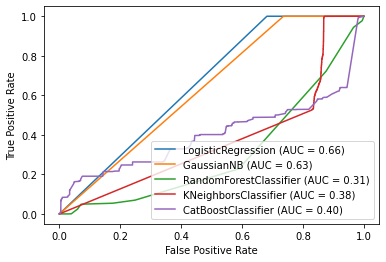

In [71]:
disp = plot_roc_curve(modelLR, X_eval, y_eval)
plot_roc_curve(modelNB, X_eval, y_eval, ax=disp.ax_);
plot_roc_curve(modelRF, X_eval, y_eval, ax=disp.ax_);
plot_roc_curve(modelKNN, X_eval, y_eval, ax=disp.ax_);
plot_roc_curve(modelCB, X_eval, y_eval, ax=disp.ax_);

In [95]:
X = X_eval
y = y_eval